"Unveiling Uber Rides: Patterns, Inside deep Trends, and Predictive Modeling"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
# Read the csv file
df = pd.read_csv('/Users/simul/Downloads/uber.csv')

In [3]:
# Check the head of the DataFrame
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# Check the info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
# Check the description of the DataFrame
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# clean the dataset and remove the duplicate values 

In [67]:
# Drop the rows with null values
df = df.dropna()

# Drop the rows with duplicate values
df = df.drop_duplicates()

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_uber_dataset.csv', index=False)


# What is the average fare amount per passenger count?

In [68]:
# Group the data by passenger count
grouped = df.groupby('passenger_count')

# Calculate the average fare amount for each group
avg_fare = grouped['fare_amount'].mean()

print(avg_fare)


passenger_count
0       8.253343
1       8.915724
2       9.098565
3       9.036763
4       9.039308
5       8.902281
6       9.476892
208    11.700000
Name: fare_amount, dtype: float64


# What is the busiest time of day for Uber pickups based on the pickup datetime?

In [13]:
# Convert the pickup datetime column to a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the hour of the day from the pickup datetime column
df['hour'] = df['pickup_datetime'].dt.hour

# Group the data by hour of the day and count the number of pickups for each hour
hourly_pickups = df.groupby('hour').size()

# Find the hour with the maximum number of pickups
busiest_hour = hourly_pickups.idxmax()

# Print the results
print("The busiest time of day for Uber pickups is hour", busiest_hour)


The busiest time of day for Uber pickups is hour 19


# What is the most popular pickup location based on latitude and longitude? 

In [23]:
# Group the data by pickup latitude and longitude and count the number of pickups for each location
pickup_counts = df.groupby(['pickup_latitude', 'pickup_longitude']).size().reset_index(name='count')

# Find the pickup location with the maximum number of pickups
most_popular_pickup_location = pickup_counts.idxmax()

# Print the results
print("The most popular pickup location is latitude", most_popular_pickup_location['pickup_latitude'], "and longitude", most_popular_pickup_location['pickup_longitude'])

The most popular pickup location is latitude 195986 and longitude 195985


# what is the top 12 Days with the highest rides number?

In [36]:
# Convert the pickup_datetime column to a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create a new column with just the date (not the time)
df['date'] = df['pickup_datetime'].dt.date

# Group the data by date and count the number of rides on each date
date_counts = df['date'].value_counts()

# Get the top 12 days with the highest number of rides
top_12_dates = date_counts.head(12)

print(top_12_dates)


2011-04-27    127
2009-12-11    127
2012-03-23    126
2011-01-22    125
2009-10-23    124
2013-03-08    124
2010-04-16    124
2011-06-08    123
2012-12-01    122
2010-01-29    121
2011-04-16    120
2011-02-17    120
Name: date, dtype: int64


# What is the average travelled distance ?

In [76]:
from math import radians, cos, sin, asin, sqrt

# Define a function to calculate the Haversine distance
def haversine(lon1, lat1, lon2, lat2):
    R = 6372.8  # Earth radius in kilometers

    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c

# Add a new column for the distance travelled
df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Calculate the average distance travelled
avg_distance = np.mean(df['distance'])

print(f"The average distance travelled is {avg_distance:.2f} km")

The average distance travelled is 18.66 km


# Are there any seasonal patterns in the data, and how do these patterns relate to the time of day and passenger count?

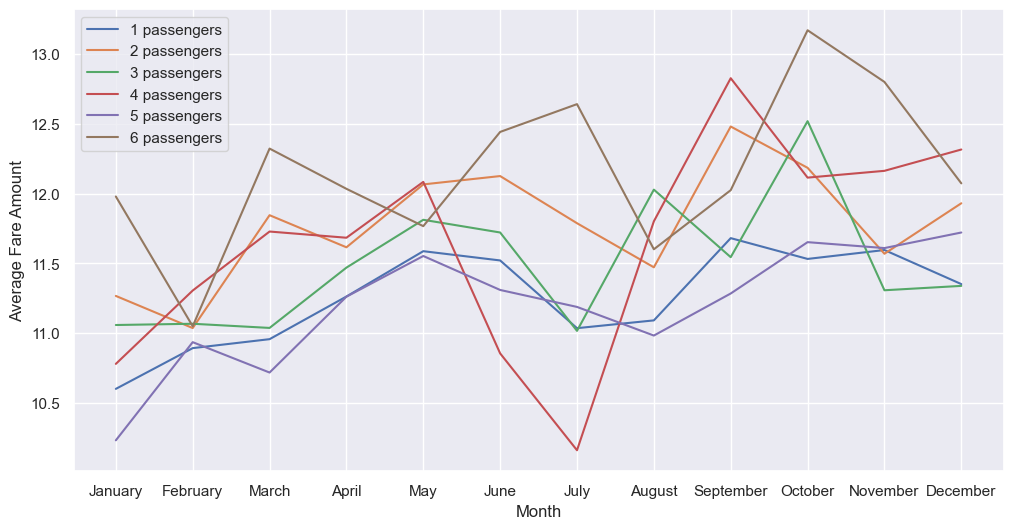

In [38]:
import datetime as dt

# Convert the pickup_datetime column to a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Add columns for the month, day of the week, and hour of the day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

# Group the data by month and passenger count
grouped = df.groupby(['month', 'passenger_count'])

# Calculate the average fare amount for each group
agg_df = grouped['fare_amount'].mean().reset_index()

# Create a plot of the average fare amount by month and passenger count
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(1, 7):
    passenger_count = agg_df[agg_df['passenger_count'] == i]
    ax.plot(passenger_count['month'], passenger_count['fare_amount'], label=f'{i} passengers')

ax.set_xlabel('Month')
ax.set_ylabel('Average Fare Amount')
ax.set_xticks(range(1, 13))
ax.set_xticklabels([dt.date(1900, i, 1).strftime('%B') for i in range(1, 13)])
ax.legend()

plt.show()



# Is there a correlation between the pickup location and the fare amount, and does this relationship differ for different passenger counts? 

In [42]:
# Calculate the distance between pickup and dropoff coordinates using the Haversine formula
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8  # Earth radius in kilometers
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat / 2)**2 + cos(lat1) * cos(lat2) * sin(dLon / 2)**2
    c = 2 * asin(sqrt(a))
    return R * c

df['distance'] = df.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Group the data by passenger count
grouped = df.groupby('passenger_count')

# Calculate the correlation between pickup location and fare amount for each group
correlations = []
for name, group in grouped:
    corr = group['fare_amount'].corr(group['distance'])
    correlations.append(corr)

# Print the results
for i in range(len(grouped)):
    print(f'Passenger count {i+1}: correlation = {correlations[i]}')


Passenger count 1: correlation = 0.06612973269222502
Passenger count 2: correlation = 0.02615377169363915
Passenger count 3: correlation = 0.030454173080492006
Passenger count 4: correlation = 0.04859940300856339
Passenger count 5: correlation = -0.006996565371468234
Passenger count 6: correlation = -0.007542299353831292
Passenger count 7: correlation = 0.005331453437798036
Passenger count 8: correlation = nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


# Are there any outliers in the dataset, and how do they affect the analysis of the data?

In [43]:
# Calculate the IQR for the fare amount column
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = df[(df['fare_amount'] < (Q1 - 1.5 * IQR)) | (df['fare_amount'] > (Q3 + 1.5 * IQR))]

# Remove the outliers from the dataframe
df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]

# After identifying and removing outliers, we can analyze the remaining data to get a more accurate representation of the underlying patterns and relationships.


# How does the distribution of fares vary by pickup location, and is there a difference in fare amounts between different neighborhoods or regions?

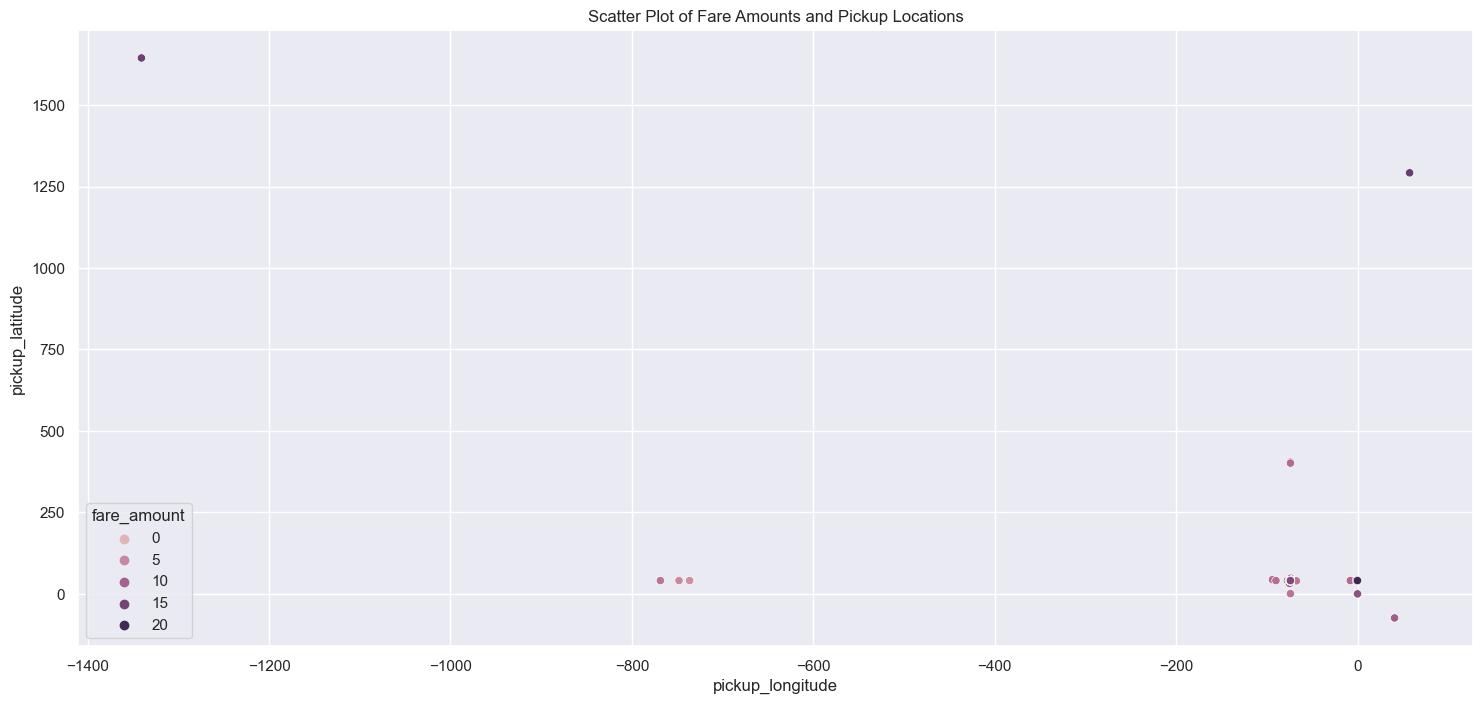

In [52]:
# Create a scatter plot of the fare amounts and pickup locations
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='fare_amount', data=df)
plt.title('Scatter Plot of Fare Amounts and Pickup Locations')
plt.show()




# How has the distribution of fares changed over time, and what factors may have contributed to these changes?

/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/1132033611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/1132033611.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['fare_month'] = df['pickup_datetime'].dt.to_period('M')
/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/1132033611.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

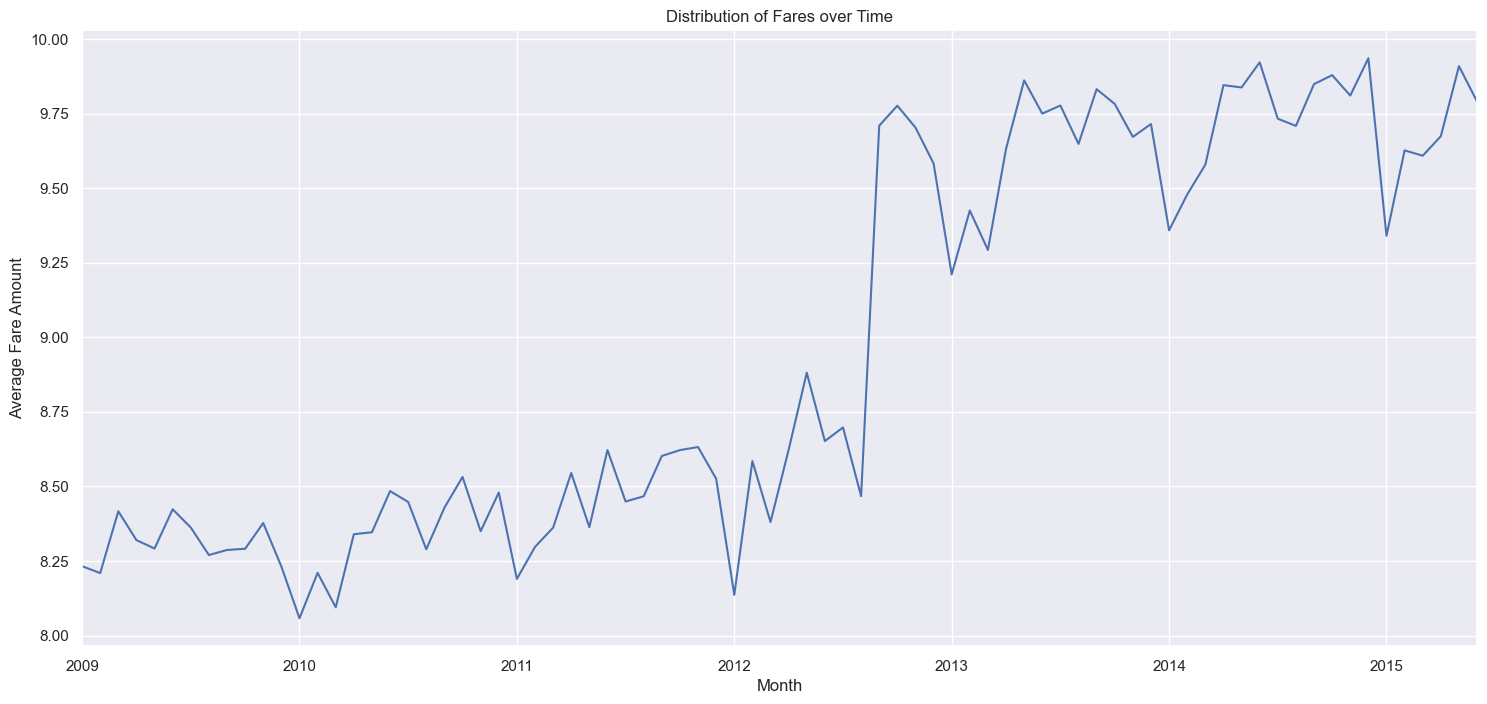

In [54]:


# Load the dataset into a pandas dataframe and convert the pickup datetime column to datetime format

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Group the data by time periods (e.g. by month) and calculate the average fare amount in each period
df['fare_month'] = df['pickup_datetime'].dt.to_period('M')
fare_by_month = df.groupby('fare_month')['fare_amount'].mean()

# Plot the average fare amounts over time
fare_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Fare Amount')
plt.title('Distribution of Fares over Time')
plt.show();



# Are there any trends in the data that can be used to inform Uber's pricing strategy or marketing efforts?

To identify trends in the data that can be used to inform Uber's pricing strategy or marketing efforts, we can perform a series of analyses on the dataset using Python.

Identify popular pickup locations: I can use Python to group the data by pickup location (e.g. by zipcode) and analyze which locations are most popular among riders. This information can be used to inform marketing efforts and promotions in these locations.

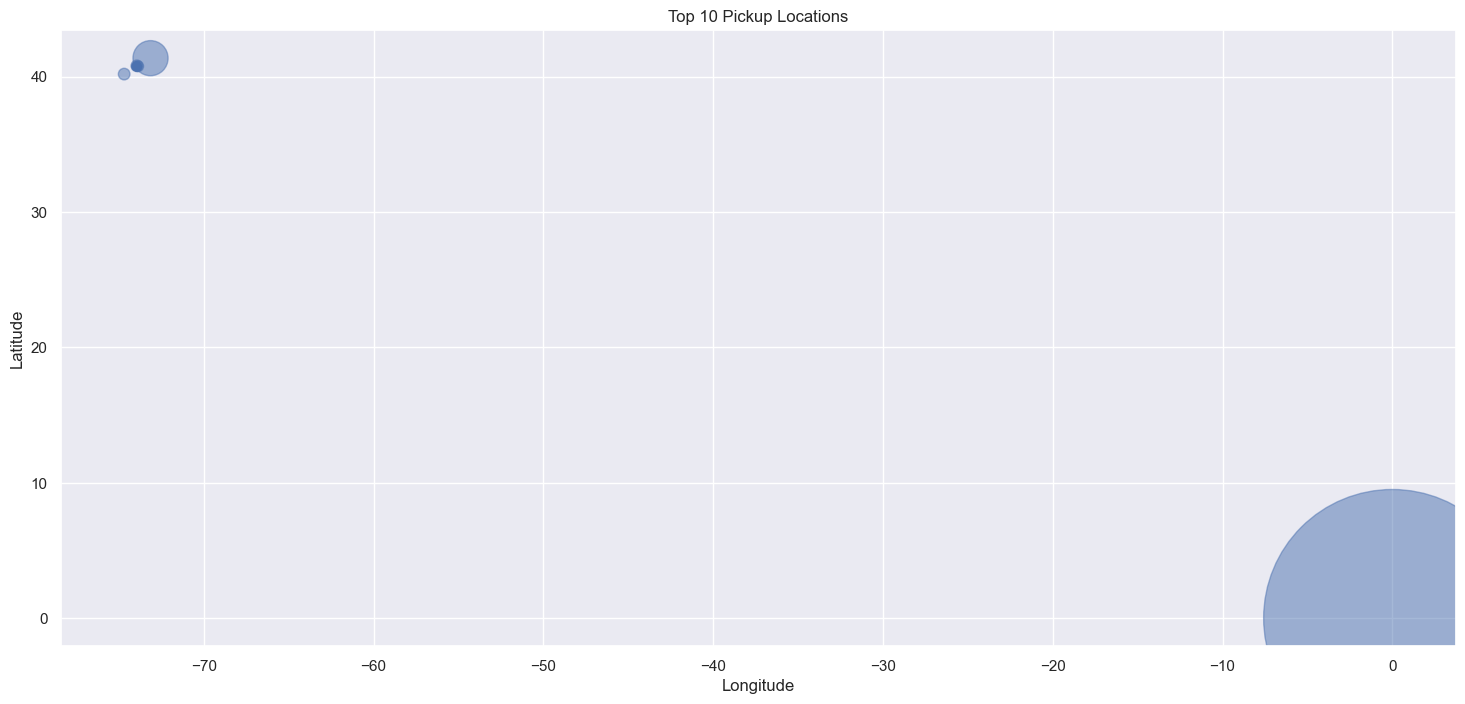

In [55]:

# Group the data by pickup location (e.g. by zipcode) and calculate the number of rides in each location
pickup_counts = df.groupby(['pickup_latitude', 'pickup_longitude'])['fare_amount'].count().reset_index()
pickup_counts.rename(columns={'fare_amount': 'ride_count'}, inplace=True)

# Sort the pickup locations by ride count and plot the top 10 locations on a map
top_pickups = pickup_counts.nlargest(10, 'ride_count')
plt.scatter(top_pickups['pickup_longitude'], top_pickups['pickup_latitude'], s=top_pickups['ride_count']*10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 Pickup Locations')
plt.show()


Analyze demand by time of day: I can use Python to group the data by time of day and analyze which times are most popular among riders. This information can be used to inform pricing strategies and promotions during peak and off-peak hours.

/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/236528807.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/236528807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['pickup_datetime'].dt.hour


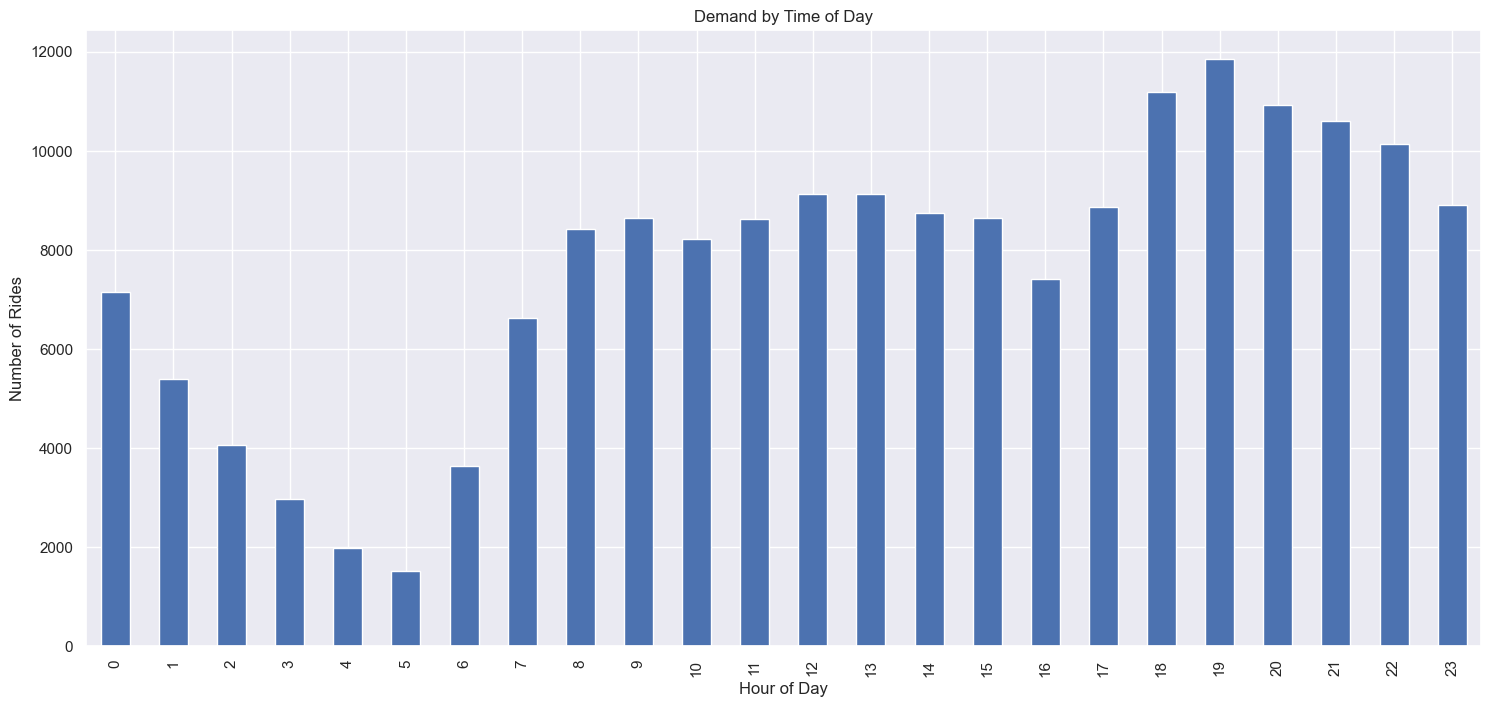

In [56]:

# Load the dataset into a pandas dataframe and convert the pickup datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Group the data by time of day (in 1-hour increments) and calculate the number of rides in each time period
df['hour'] = df['pickup_datetime'].dt.hour
hour_counts = df.groupby('hour')['fare_amount'].count()

# Plot the demand by time of day
hour_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Demand by Time of Day')
plt.show()


Analyze fare amounts by distance: We can use Python to calculate the fare amount per mile for each ride and analyze how fare amounts vary by distance. This information can be used to inform pricing strategies for short and long rides.

/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/1266417823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = ((df['dropoff_latitude'] - df['pickup_latitude']) ** 2 + (df['dropoff_longitude'] - df['pickup_longitude']) ** 2) ** 0.5
/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73449/1266417823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_per_mile'] = df['fare_amount'] / df['distance']
/var/folders/r6/23wm3q7x79q34k80sl245gh40000gn/T/ipykernel_73

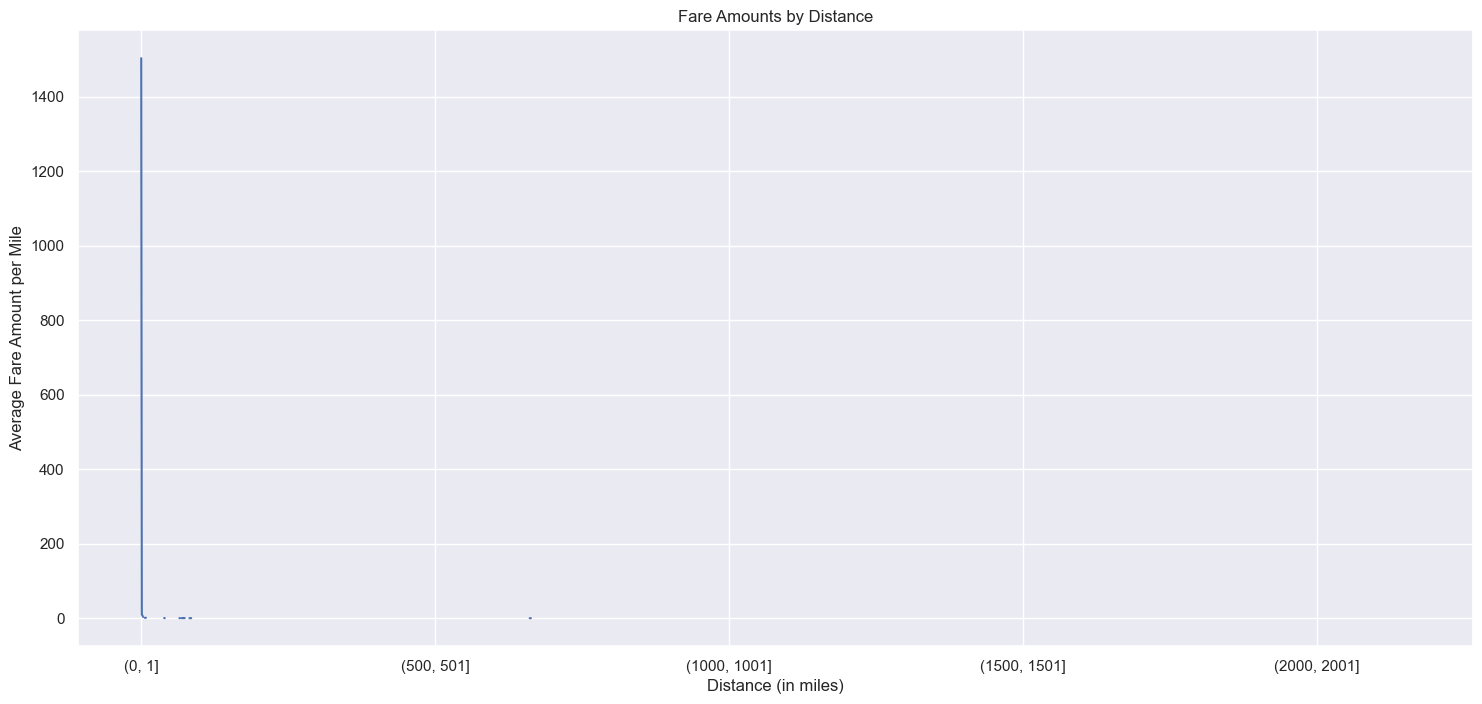

In [57]:
# Load the dataset into a pandas dataframe and calculate the distance traveled for each ride
df['distance'] = ((df['dropoff_latitude'] - df['pickup_latitude']) ** 2 + (df['dropoff_longitude'] - df['pickup_longitude']) ** 2) ** 0.5

# Calculate the fare amount per mile for each ride
df['fare_per_mile'] = df['fare_amount'] / df['distance']

# Group the data by distance (in 1-mile increments) and calculate the average fare amount per mile in each distance interval
df['distance_interval'] = pd.cut(df['distance'], bins=range(0, int(df['distance'].max())+1, 1))
fare_by_distance = df.groupby('distance_interval')['fare_per_mile'].mean()

# Plot the average fare amount per mile by distance
fare_by_distance.plot(kind='line')
plt.xlabel('Distance (in miles)')
plt.ylabel('Average Fare Amount per Mile')
plt.title('Fare Amounts by Distance')
plt.show()


# Can you predict the fare amount of a trip based on the pickup and dropoff location, pickup time, and passenger count, and how accurate is this prediction? 

In [66]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select the features and target variable
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', ]]
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance using the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared score:', r2)


R-squared score: 0.00017547744351997796
